In [167]:
# 도로교통공단_전국_사망교통사고정보(2018).csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import folium

matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

df = pd.read_csv('data/도로교통공단_전국_사망교통사고정보(2018).csv', encoding='euc-kr')
df

,발생년,발생년월일시,발생분,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,...,도로형태_대분류,도로형태,가해자_당사자종별_대분류,가해자_당사자종별,피해자_당사자종별_대분류,피해자_당사자종별,발생위치X_UTMK,발생위치Y_UTMK,경도,위도
0,2018,2018021406,35,주,수,1,1,0,0,0,...,단일로,기타단일로,승용차,승용차,보행자,보행자,950497.0,1954702.0,126.939274,37.590388
1,2018,2018090205,23,야,일,1,1,0,0,0,...,교차로,교차로횡단보도내,승용차,승용차,보행자,보행자,953337.0,1950150.0,126.971732,37.549508
2,2018,2018121522,35,야,토,1,1,0,0,0,...,단일로,기타단일로,이륜차,이륜차,없음,없음,956967.0,1954807.0,127.012552,37.591659
3,2018,2018082311,30,주,목,1,1,0,0,0,...,단일로,기타단일로,승합차,승합차,없음,없음,958020.0,1959193.0,127.024227,37.631240
4,2018,2018071600,50,야,월,1,1,0,0,0,...,교차로,교차로횡단보도내,화물차,화물차,보행자,보행자,957606.0,1958258.0,127.019590,37.622794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3652,2018,2018052103,55,야,월,1,1,0,0,0,...,단일로,기타단일로,승용차,승용차,없음,없음,973070.0,1988564.0,127.193701,37.896529
3653,2018,2018060808,43,주,금,1,1,0,0,0,...,단일로,기타단일로,화물차,화물차,농기계,농기계,979900.0,2006212.0,127.270890,38.055765
3654,2018,2018012010,15,주,토,1,1,0,0,0,...,단일로,기타단일로,승용차,승용차,없음,없음,1001226.0,1959902.0,127.513896,37.638589
3655,2018,2018020321,5,야,토,1,1,0,0,0,...,단일로,기타단일로,승용차,승용차,승용차,승용차,1000491.0,1988419.0,127.505584,37.895621


In [238]:
#1. 서울에서 일어난 요일별 사망자수, 사상자수 를 출력하시요
df[df['발생지시도']=='서울'].pivot_table(index='요일', values=['사망자수', '사상자수'], aggfunc='sum')

,사망자수,사상자수
요일,,
금,38,52
목,52,76
수,37,48
월,53,84
일,37,58
토,46,62
화,41,45


In [245]:
# 2. 서울 강북구 지역의 교통사고 위치를 지도로 표시하고 각마커에는 법규위반내용 을 표시하시요

map = folium.Map(location=(37.565730201564996, 126.97804448113926), zoom_start=10)

ganbook = df[(df['발생지시도'] == '서울') & (df['발생지시군구'] == '강북구')]
for latitude, longitude, violation in zip(ganbook['위도'], ganbook['경도'], ganbook['법규위반']):
    mk = folium.Marker(location=(latitude, longitude), popup=violation)
    mk.add_to(map)
map

In [63]:
# 3. 부산에서 발생한 총 사망자수를 구하시요
df[(df['발생지시도'] == '부산')]['사망자수'].sum()

123

In [77]:
# 4. 서울지역 월요일에 발생한 사상자수 사고유형 법규위반을 구하시요
df[(df['발생지시도'] == '서울') & (df['요일'] == '월')][['사고유형', '법규위반']]


,사고유형,법규위반
4,기타,안전운전 의무 불이행
6,횡단중,신호위반
26,기타,안전운전 의무 불이행
27,길가장자리구역통행중,안전운전 의무 불이행
29,기타,보행자 보호의무 위반
424,측면충돌,안전운전 의무 불이행
427,횡단중,신호위반
430,횡단중,신호위반
431,기타,안전운전 의무 불이행
437,횡단중,보행자 보호의무 위반


In [244]:
# 5.횡단중 일어난 사고의 요일 발생지시도, 법규위반, 피해자_당사자종별을 구하시요
df[(df['사고유형'] == '횡단중')][['요일', '발생지시도', '법규위반', '피해자_당사자종별']]

,요일,발생지시도,법규위반,피해자_당사자종별
0,수,서울,안전운전 의무 불이행,보행자
1,일,서울,안전운전 의무 불이행,보행자
5,일,서울,안전운전 의무 불이행,보행자
6,월,서울,신호위반,보행자
7,금,서울,과속,보행자
...,...,...,...,...
3636,목,경기,보행자 보호의무 위반,보행자
3639,금,경기,신호위반,보행자
3643,토,경기,안전운전 의무 불이행,보행자
3646,화,경기,안전운전 의무 불이행,보행자


In [243]:
from bs4 import BeautifulSoup
from urllib.request import urlopen

murl = 'https://movie.naver.com/movie/running/current.naver'
response = urlopen( murl )
html = BeautifulSoup( response, 'html.parser' )
html


<!DOCTYPE html>

<html lang="ko">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="no" http-equiv="imagetoolbar"/>
<title>현재 상영영화 : 네이버 영화</title>
<meta content="https://ssl.pstatic.net/imgmovie/today/naverme/naverme_profile.jpg" property="me2:image">
<meta content="네이버영화 현재상영작" property="me2:post_tag">
<meta content="네이버영화" property="me2:category1">
<meta content="현재상영작" property="me2:category2"/>
<meta content="현재상영작 : 네이버 영화" property="og:title"/>
<meta content="article" property="og:type"/>
<meta content="https://movie.naver.com/movie/running/current.naver" property="og:url"/>
<meta content="https://ssl.pstatic.net/static/m/movie/icons/OG_270_270.png" property="og:image"/>
<meta content="상영 중 영화의 예매율/평점/좋아요 순 정보 제공." property="og:description"/>
<meta content="https://ssl.pstatic.net/imgmovie/today/naverme/naverme_profile.jpg" property="og:article:thumbnailUrl"/>
<meta content="네이버 영화" property="og:article:author"/>
<meta content=

In [242]:
# 6. https://movie.naver.com/movie/running/current.naver 를 파싱하여 아래처럼 출력하시요
# 	영화명	평점		개봉일
# =======================	
# 나일강의 죽음	7.6 	2022.02.0 개봉
# 나의 촛불 	7.0	2022.02.10  개봉
#content > div.article > div:nth-child(1) > div.lst_wrap > ul > li:nth-child(1) > dl > dt > a
# 개봉일
#content > div.article > div:nth-child(1) > div.lst_wrap > ul > li:nth-child(1) > dl > dd:nth-child(3) > dl > dd:nth-child(2) > span:nth-child(3)
uI = html.select_one('div.lst_wrap > ul')
for li in uI.select('li'):        
    index = 0
    openMovie = ""
    dd = li.select_one('.info_txt1 > dd')
    for child in dd.children:
        index += 1
        if (index == 7):
            openMovie = child.strip()
    print('영화명 : ', li.select_one('.tit > a').string)
    print('평점 : ', float(li.select_one('.star_t1 > a > .num').string) )
    
    print('개봉일 : ', openMovie)
    

영화명 :  나일 강의 죽음
평점 :  7.88
개봉일 :  2022.02.09 개봉
영화명 :  나의 촛불
평점 :  6.57
개봉일 :  2022.02.10 개봉
영화명 :  해적: 도깨비 깃발
평점 :  6.21
개봉일 :  2022.01.26 개봉
영화명 :  킹메이커
평점 :  7.5
개봉일 :  2022.01.26 개봉
영화명 :  355
평점 :  6.41
개봉일 :  2022.02.09 개봉
영화명 :  극장판 안녕 자두야: 제주도의 비밀
평점 :  8.9
개봉일 :  2022.01.27 개봉
영화명 :  스파이더맨: 노 웨이 홈
평점 :  8.87
개봉일 :  2021.12.15 개봉
영화명 :  씽2게더
평점 :  9.42
개봉일 :  2022.01.05 개봉
영화명 :  미싱타는 여자들
평점 :  8.93
개봉일 :  2022.01.20 개봉
영화명 :  굿 보스
평점 :  7.78
개봉일 :  2022.02.10 개봉
영화명 :  만년이 지나도 변하지 않는 게 있어
평점 :  6.76
개봉일 :  2022.02.09 개봉
영화명 :  어나더 라운드
평점 :  8.29
개봉일 :  2022.01.19 개봉
영화명 :  가슴이 떨리는 건 너 때문
평점 :  6.69
개봉일 :  2022.02.09 개봉
영화명 :  듄
평점 :  7.97
개봉일 :  2022.02.09 개봉
영화명 :  드라이브 마이 카
평점 :  8.56
개봉일 :  2021.12.23 개봉
영화명 :  리코리쉬 피자
평점 :  8.0
개봉일 :  2022.02.16 개봉
영화명 :  언차티드
평점 :  8.05
개봉일 :  2022.02.16 개봉
영화명 :  온 세상이 하얗다
평점 :  8.67
개봉일 :  2022.02.10 개봉
영화명 :  하우스 오브 구찌
평점 :  7.92
개봉일 :  2022.01.12 개봉
영화명 :  효자
평점 :  9.53
개봉일 :  2022.01.27 개봉
영화명 :  원 세컨드
평점 :  7.59
개봉일 :  2022.01.27 개봉

In [241]:
# 7. 위의 결과를 데이터프레임으로 변환후 평점이 8.0 이상인 영화명 평점 개봉일을 출력하시요
mList = []
uI = html.select_one('div.lst_wrap > ul')
for li in uI.select('li'):
    index = 0
    openMovie = ""
    dd = li.select_one('.info_txt1 > dd')
    for child in dd.children:
        index += 1
        if (index == 7):
            openMovie = child.strip()
    openMovie = openMovie.strip('개봉')
    mList.append({
        '영화명': li.select_one('.tit > a').string,
        '평점': float(li.select_one('.star_t1 > a > .num').string),
        '개봉일': openMovie
        #'개봉일':li.select_one('dd:nth-child(2) > span:nth-child(3)').next_sibling.string.strip()})
    })
movieDF = pd.DataFrame(mList)
movieDF[movieDF['평점'] >= 8.0]

,영화명,평점,개봉일
5,극장판 안녕 자두야: 제주도의 비밀,8.90,2022.01.27
6,스파이더맨: 노 웨이 홈,8.87,2021.12.15
7,씽2게더,9.42,2022.01.05
8,미싱타는 여자들,8.93,2022.01.20
11,어나더 라운드,8.29,2022.01.19
14,드라이브 마이 카,8.56,2021.12.23
15,리코리쉬 피자,8.00,2022.02.16
16,언차티드,8.05,2022.02.16
17,온 세상이 하얗다,8.67,2022.02.10
19,효자,9.53,2022.01.27


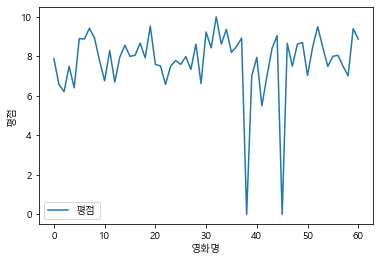

In [240]:
# 8. x축을 영화명 으로 y축을 평점으로 라인차트를 그리시요
movieDF.plot(kind='line', xlabel = '영화명', ylabel = '평점')
plt.show()




In [239]:
# 9. 2022년01월 01일 이후 개봉한 영화명,평점,개봉일을 구하시요
import time
curTime = pd.to_datetime('2022.01.01')
movieDF[pd.to_datetime(movieDF['개봉일']) >= curTime]        

,영화명,평점,개봉일
0,나일 강의 죽음,7.88,2022.02.09
1,나의 촛불,6.57,2022.02.10
2,해적: 도깨비 깃발,6.21,2022.01.26
3,킹메이커,7.50,2022.01.26
4,355,6.41,2022.02.09
5,극장판 안녕 자두야: 제주도의 비밀,8.90,2022.01.27
7,씽2게더,9.42,2022.01.05
8,미싱타는 여자들,8.93,2022.01.20
9,굿 보스,7.78,2022.02.10
10,만년이 지나도 변하지 않는 게 있어,6.76,2022.02.09
